In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# data preprocessing

In [7]:
al_data=pd.read_csv('data_m.txt')
figure=plt.figure()
#sns.pairplot(x_vars=['MTOR_all_mutations','PLEKHN1_methylation','RHD_CN','BONE'],y_vars=['metabolite'],data=al_data,dropna=True)
#plt.show()
#print(al_data.describe())
al_data.drop(['Unnamed: 0'], axis=1, inplace=True)
al_data.shape
al_data[:5]

,metabolite,LUNG,LARGE,HAEMATOPOIETIC,URINARY,BONE,SKIN,BREAST,LIVER,OVARY,...,MAPK11_methylation,PLXNB2_methylation,ADM2_methylation,SHANK3_methylation,Name,Name_with_tissue_origins,Classifications,Cell_culture_media,Gender,Doubling_time
0,5.547539,0,0,0,0,0,0,0,0,0,...,0.028242,0.041674,0.013727,0.021739,22RV1,22RV1_PROSTATE,prostate,RPMI 1640 + 10% FBS,male,51.8
1,5.713293,0,0,0,0,0,0,0,0,0,...,0.081100,0.024002,0.040091,0.033592,2313287,2313287_STOMACH,stomach,RPMI 1640 + 10% FBS,male,51.7
2,5.938332,0,0,0,1,0,0,0,0,0,...,0.148349,0.000000,0.001691,0.697439,253J,253J_URINARY_TRACT,urinary_tract,DMEM + 10% FBS,male,28.4
3,5.969561,0,0,0,1,0,0,0,0,0,...,0.018885,0.002415,0.012225,0.007718,253JBV,253JBV_URINARY_TRACT,urinary_tract,DMEM + 10% FBS,male,28.9
4,6.499377,0,0,0,0,0,0,0,0,0,...,0.048741,0.007507,0.389182,0.059667,42MGBA,42MGBA_CENTRAL_NERVOUS_SYSTEM,glioma,RPMI:EMEM = 1:1 + 20% FBS,male,38.4


<Figure size 432x288 with 0 Axes>

In [8]:
count=al_data.isnull().sum().sort_values(ascending=False)
ratio=count/len(al_data)
nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])
nulldata[:10]

,count,ratio
Doubling_time,221,0.238147
CCDC89_methylation,114,0.122845
ANXA3_methylation,112,0.120690
TNS4_methylation,111,0.119612
HIST1H3G_methylation,111,0.119612
ZNF229_methylation,109,0.117457
IFITM1_methylation,108,0.116379
PRKCDBP_methylation,108,0.116379
ARHGDIB_methylation,108,0.116379
HFE_methylation,107,0.115302


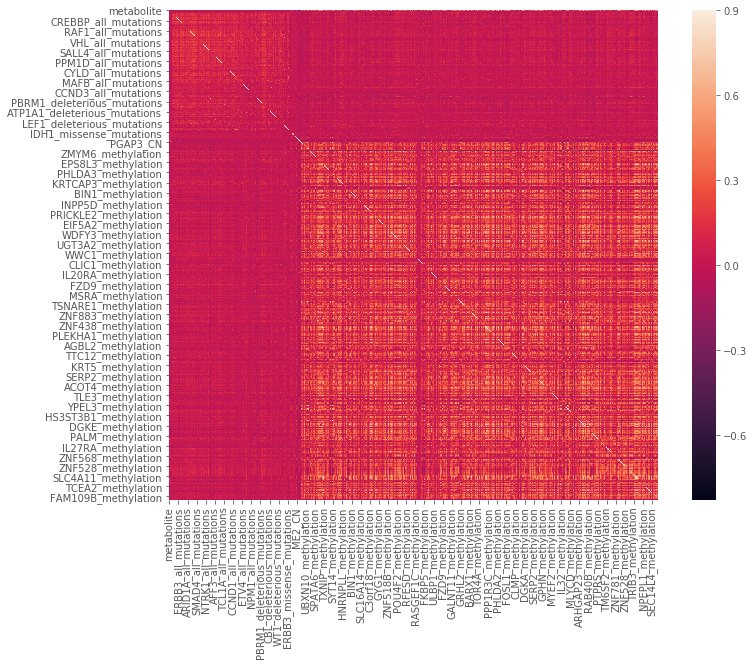

In [61]:
corrmat = al_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [9]:
from sklearn import preprocessing
from scipy.special import boxcox,inv_boxcox

def processing_data(X):

    number_X = X.select_dtypes(exclude=object)

    my_imputer = preprocessing.Imputer(strategy='mean')
    new_number_X = my_imputer.fit_transform(number_X)
    for i in number_X.columns:
        if abs(number_X[i].skew()) > 0.75:
            number_X[i] = boxcox(number_X[i], 0.5)
    number_X = pd.DataFrame(new_number_X,columns=number_X.columns)
    print('--------------------digital type processed done--------------------')

    category_X = X.select_dtypes(include=object)

    for i in category_X.columns:
       category_X[i] = category_X[i].fillna('noinfo')
    print('--------------------feature type processed done--------------------')

    X = pd.concat([number_X,category_X],axis=1)

    return X


al_data_rm0=processing_data(al_data)
al_data_rm0=pd.get_dummies(al_data_rm0,drop_first=True)

--------------------digital type processed done--------------------
--------------------feature type processed done--------------------


In [10]:
count=al_data_rm0.isnull().sum().sort_values(ascending=False)
ratio=count/len(al_data_rm0)
nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])
nulldata[:5]

,count,ratio
Gender_noinfo,0,0.0
PLEKHA8_methylation,0,0.0
TBX20_methylation,0,0.0
EPDR1_methylation,0,0.0
STARD3NL_methylation,0,0.0


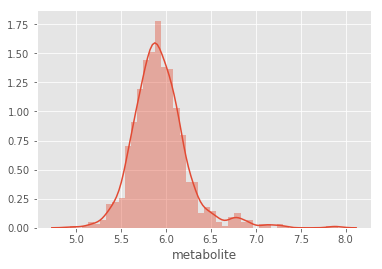

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(al_data_rm0.metabolite)
plt.show()

# practice 1
github massquantity/Kaggle-HousePrices

In [11]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

import pylab
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import Imputer

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [12]:
train_index=int(0.7*al_data_rm0.shape[0])

train=al_data_rm0[:train_index]
test=al_data_rm0[train_index:]
train[:5]

,metabolite,LUNG,LARGE,HAEMATOPOIETIC,URINARY,BONE,SKIN,BREAST,LIVER,OVARY,...,Cell_culture_media_RPMI 1640 + 20% FBS,Cell_culture_media_RPMI 1640 + 5% FBS,Cell_culture_media_RPMI:EMEM = 1:1 + 20% FBS,Cell_culture_media_RPMI:F12 = 1:1 + 10% FBS,Cell_culture_media_RPMI:F12 = 1:1 + 5% FBS,Cell_culture_media_RPMI:MEM = 1:1 + 20% FBS,Cell_culture_media_Waymouth MB 7521 medium+ 10% FBS,Cell_culture_media_William's E Medium + 10% FBS,Gender_male,Gender_noinfo
0,5.547539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,5.713293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,5.938332,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,5.969561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,6.499377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0


### Exploratory Visualization
check correlation with specific feature and metabolite（label Y）.

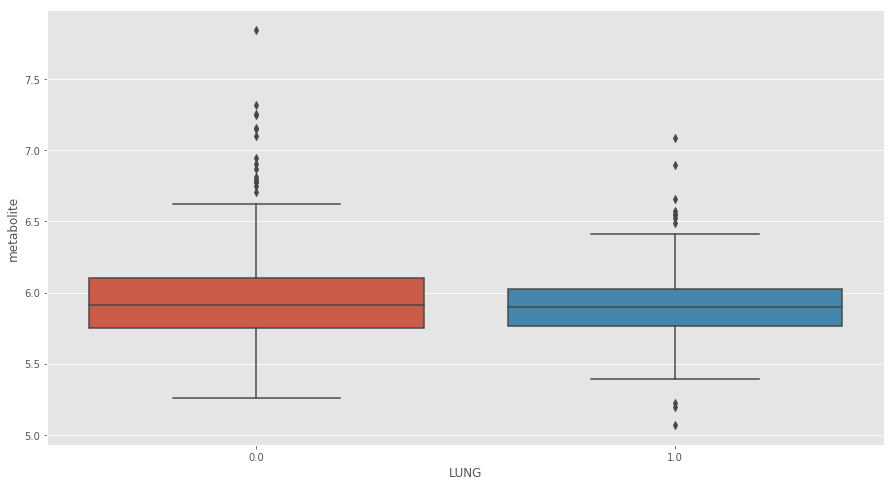

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(train.LUNG, train.metabolite)

Text(0,0.5,'metabolite')

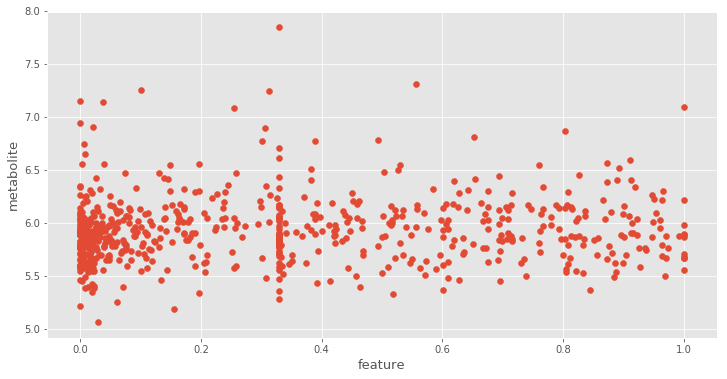

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.ABCC3_methylation, y=train.metabolite)
plt.xlabel("feature", fontsize=13)
plt.ylabel("metabolite", fontsize=13)
#plt.ylim(0,800000)

In [16]:
al_data_rm0.shape

(928, 4832)

In [17]:
train_index=int(0.7*al_data_rm0.shape[0])
data_pipe=al_data_rm0
train=data_pipe[:train_index]

data_pipe.drop(['metabolite'], axis=1, inplace=True)
X_scaled = data_pipe[:train_index]
test_X_scaled = data_pipe[train_index:]
y_log =train.metabolite

In [18]:
count=al_data_rm0.isnull().sum().sort_values(ascending=False)
ratio=count/len(al_data)
nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])
nulldata[:10]

,count,ratio
Gender_noinfo,0,0.0
PLEKHA8_methylation,0,0.0
TBX20_methylation,0,0.0
EPDR1_methylation,0,0.0
STARD3NL_methylation,0,0.0
AMPH_methylation,0,0.0
GLI3_methylation,0,0.0
BLVRA_methylation,0,0.0
AEBP1_methylation,0,0.0
NACAD_methylation,0,0.0


### Feature Selection

I have to confess, the feature engineering above is not enough, so we need more.
Combining different features is usually a good way, but we have no idea what features should we choose. Luckily there are some models that can provide feature selection, here I use Lasso, but you are free to choose Ridge, RandomForest or GradientBoostingTree.

In [23]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)
FI_lasso = pd.DataFrame({"Feature_Importance":lasso.coef_}, index=X_scaled.columns)
FI_lasso.sort_values("Feature_Importance",ascending=False)[:10]

,Feature_Importance
Cell_culture_media_EMEM + 10% FBS,0.137605
TCF15_methylation,0.134797
MSH6_all_mutations,0.123150
ZNF879_methylation,0.117416
GTSF1_methylation,0.116287
MTOR_all_mutations,0.114716
PHYHD1_methylation,0.106130
NRSN2_methylation,0.104423
NF2_deleterious_mutations,0.099938
ERCC2_all_mutations,0.099554


In [32]:
FI_lasso[FI_lasso["Feature_Importance"]!=0].sort_values("Feature_Importance").shape
#FI_lasso[FI_lasso["Feature_Importance"]!=0].sort_values("Feature_Importance").plot(kind="barh",figsize=(0,1))
#plt.xticks(rotation=90)
#plt.show()

(423, 1)

### PCA

In [33]:
pca = PCA(n_components=423)
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)
X_scaled.shape, test_X_scaled.shape

((649, 423), (279, 423))

### Modeling & Evaluation

In [52]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse


We choose 13 models and use 5-folds cross-calidation to evaluate these models.
Models include:

- LinearRegression
- Ridge
- Lasso
- Random Forrest
- Gradient Boosting Tree
- Support Vector Regression
- Linear Support Vector Regression
- ElasticNet
- Stochastic Gradient Descent
- BayesianRidge
- KernelRidge
- ExtraTreesRegressor
- XgBoost

In [53]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [54]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 1.020278, 0.1497
Ridge: 0.720417, 0.0761
Lasso: 0.304175, 0.0267
RF: 0.321979, 0.0287
GBR: 0.319222, 0.0228
SVR: 0.308837, 0.0262
LinSVR: 1.085656, 0.2142
Ela: 0.457548, 0.0344
SGD: 2009125637842.601562, 2817053451140.7217
Bay: 0.300185, 0.0241
Ker: 0.322016, 0.0234
Extra: 0.331106, 0.0315
[10:36:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgb: 0.317099, 0.0234


In [34]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

#### LASSO

In [37]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

({'alpha': 0.0009, 'max_iter': 10000}, 0.39716263439891575)
                                   params  mean_test_score  std_test_score
0  {u'alpha': 0.0004, u'max_iter': 10000}         0.496472        0.037449
1  {u'alpha': 0.0005, u'max_iter': 10000}         0.465064        0.032512
2  {u'alpha': 0.0007, u'max_iter': 10000}         0.422967        0.028777
3  {u'alpha': 0.0006, u'max_iter': 10000}         0.441837        0.029262
4  {u'alpha': 0.0009, u'max_iter': 10000}         0.397163        0.028664
5  {u'alpha': 0.0008, u'max_iter': 10000}         0.408612        0.029105


#### Ridge

In [44]:
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

({'alpha': 90}, 0.3067717892047164)
           params  mean_test_score  std_test_score
0  {u'alpha': 35}         0.327560        0.018137
1  {u'alpha': 40}         0.323168        0.017720
2  {u'alpha': 45}         0.319758        0.017381
3  {u'alpha': 50}         0.317047        0.017100
4  {u'alpha': 55}         0.314852        0.016862
5  {u'alpha': 60}         0.313047        0.016658
6  {u'alpha': 65}         0.311542        0.016482
7  {u'alpha': 70}         0.310274        0.016328
8  {u'alpha': 80}         0.308269        0.016073
9  {u'alpha': 90}         0.306772        0.015870


#### SVR

In [39]:
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

({'epsilon': 0.009, 'C': 11, 'gamma': 0.0003, 'kernel': 'rbf'}, 0.3197490749972626)
                                               params  mean_test_score  \
0   {u'epsilon': 0.008, u'C': 11, u'gamma': 0.0003...         0.319869   
1   {u'epsilon': 0.008, u'C': 11, u'gamma': 0.0004...         0.326689   
2   {u'epsilon': 0.009, u'C': 11, u'gamma': 0.0003...         0.319749   
3   {u'epsilon': 0.009, u'C': 11, u'gamma': 0.0004...         0.326611   
4   {u'epsilon': 0.008, u'C': 12, u'gamma': 0.0003...         0.322098   
5   {u'epsilon': 0.008, u'C': 12, u'gamma': 0.0004...         0.329697   
6   {u'epsilon': 0.009, u'C': 12, u'gamma': 0.0003...         0.321998   
7   {u'epsilon': 0.009, u'C': 12, u'gamma': 0.0004...         0.329616   
8   {u'epsilon': 0.008, u'C': 13, u'gamma': 0.0003...         0.324470   
9   {u'epsilon': 0.008, u'C': 13, u'gamma': 0.0004...         0.332579   
10  {u'epsilon': 0.009, u'C': 13, u'gamma': 0.0003...         0.324379   
11  {u'epsilon': 0.009, u'C'

#### Kernel Ridge

In [40]:
param_grid={'alpha':[0.2,0.3,0.4,0.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,1.2]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)

({'alpha': 0.5, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}, 1.4990623757958497)
                                               params  mean_test_score  \
0   {u'alpha': 0.2, u'coef0': 0.8, u'degree': 3, u...         1.813525   
1   {u'alpha': 0.2, u'coef0': 1, u'degree': 3, u'k...         1.786823   
2   {u'alpha': 0.2, u'coef0': 1.2, u'degree': 3, u...         1.754599   
3   {u'alpha': 0.3, u'coef0': 0.8, u'degree': 3, u...         1.698232   
4   {u'alpha': 0.3, u'coef0': 1, u'degree': 3, u'k...         1.674371   
5   {u'alpha': 0.3, u'coef0': 1.2, u'degree': 3, u...         1.653567   
6   {u'alpha': 0.4, u'coef0': 0.8, u'degree': 3, u...         1.615112   
7   {u'alpha': 0.4, u'coef0': 1, u'degree': 3, u'k...         1.584643   
8   {u'alpha': 0.4, u'coef0': 1.2, u'degree': 3, u...         1.569632   
9   {u'alpha': 0.5, u'coef0': 0.8, u'degree': 3, u...         1.555201   
10  {u'alpha': 0.5, u'coef0': 1, u'degree': 3, u'k...         1.512167   
11  {u'alpha': 0.5, u'co

#### ElasticNet

In [41]:
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000]})

({'alpha': 0.005, 'max_iter': 10000, 'l1_ratio': 0.7}, 0.3176040600251896)
                                               params  mean_test_score  \
0   {u'alpha': 0.0005, u'max_iter': 10000, u'l1_ra...         0.816470   
1   {u'alpha': 0.0005, u'max_iter': 10000, u'l1_ra...         0.796024   
2   {u'alpha': 0.0005, u'max_iter': 10000, u'l1_ra...         0.650841   
3   {u'alpha': 0.0005, u'max_iter': 10000, u'l1_ra...         0.567810   
4   {u'alpha': 0.0005, u'max_iter': 10000, u'l1_ra...         0.514675   
5   {u'alpha': 0.0008, u'max_iter': 10000, u'l1_ra...         0.736715   
6   {u'alpha': 0.0008, u'max_iter': 10000, u'l1_ra...         0.713141   
7   {u'alpha': 0.0008, u'max_iter': 10000, u'l1_ra...         0.563330   
8   {u'alpha': 0.0008, u'max_iter': 10000, u'l1_ra...         0.488636   
9   {u'alpha': 0.0008, u'max_iter': 10000, u'l1_ra...         0.447791   
10  {u'alpha': 0.004, u'max_iter': 10000, u'l1_rat...         0.464758   
11  {u'alpha': 0.004, u'max_iter': 10

# Ensemble Methods

#### Weight Average
Average base models according to their weights.

In [48]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [57]:
lasso = Lasso(alpha=0.0009,max_iter=10000)
svr = SVR(gamma= 0.0003,kernel='rbf',C=11,epsilon=0.009)
ker = KernelRidge(alpha=0.5 ,kernel='polynomial',degree=3 , coef0=1.2)
ela = ElasticNet(alpha=0.005,l1_ratio=0.7,max_iter=10000)
bay = BayesianRidge()

In [58]:
# assign weights based on their gridsearch score
w1 = 0.2
w2 = 0.2
w3 = 0.2
w4 = 0.2
w5 = 0.2

In [59]:
weight_avg = AverageWeight(mod = [lasso,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5])
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.4082600637349181


In [60]:
rmse_cv(weight_avg,X_scaled,y_log),  rmse_cv(weight_avg,X_scaled,y_log).mean()

(array([0.29025496, 0.35901813, 0.48345212, 0.28574435, 0.62283075]),
 0.4082600637349181)